<div align='right'><h3>clase 12 de septiembre del 2023</h3></div>

¿Qué es un número aleatorio?

Los números aleatorios son números que se obtienen al azar, es decir, que todo número tenga la misma probabilidad de ser elegido y que la elección de uno no dependa de la elección del otro.

In [2]:
def random_number(n=5):
    if n > 0:
        nums = list()
        for i in range(1, n + 1):
            nums.append((((n**i) // i) + (n - i)) // i)
        return nums
    else:
        return []

In [3]:
for i in range(1,10):
    print(random_number(i))

[1]
[3, 1]
[5, 2, 3]
[7, 5, 7, 16]
[9, 7, 14, 39, 125]
[11, 11, 25, 81, 311, 1296]
[13, 14, 39, 150, 672, 3268, 16807]
[15, 19, 58, 257, 1311, 7282, 42799, 262144]
[17, 23, 83, 411, 2362, 14762, 97611, 672605, 4782969]


Cuadrados medios y registro de desplazamiento y vamos a finalizar con congruencia lineal

Encontrarle una aplicación práctica, para entender donde los podemos aplicar

Como trabaja random de numpy

- Una secuancia de números aleatorios no tiene un patron de comportamiento.
- Los numeros de la secuecia de pi puede considerarse aleatorio.
- Solo es posible conseguirlo mediante un proceso verdaderamente aleatorio.
- En cuestion de números pseudoaleatorio no contien patron de comportamiento o de regularidad desde un punto de vista estadistico, son generados desde un lagoritmo determinista que genera siempre los mimos numeros.

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
nums = np.random.randint(0, 100, size=10)
print(nums)

[84 13 56 12 27  1 70 83 89 87]


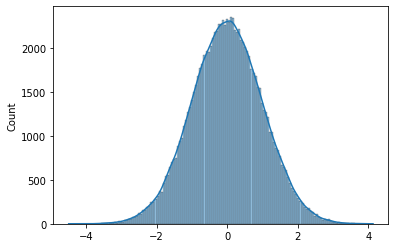

In [6]:
_= sns.histplot(np.random.normal(0,1,100000), kde=True)
plt.show()

# Tarea

### Método de los cuadrados medios

Es un método propuesto en los años 40 por los matemáticos John Von Neumann y Nicholas Metropolis, siendo utilizado para la generación de números pseudoaleatorios. Esto para obtener usa sucesión de números que básicamente se obtienen a aprtir de recurrencia, los cuales son relevantes en los procesos de simulación debido a  que con estos números se hace posible comprobar el correcto funcionamiento de una prueba mediante la observación del comportamiento de las variables que se puedan encontrar a lo largo de la simulación.

#### Aplicación del Método

El método consiste en tomar un número al azar, X° de 2n cifras que al ser elevado al cuadrado resulta un número de hasta 4n cifras, de no ser así se deben agregar ceros a la izquierda de dicho resultado para que éste tenga exactamente 4n cifras.

Se denomina X1 al número resultante de seleccionar las 2n cifras centrales del resultado anterior.

Se genera el número pseudoaleatorio U1 ubicando un punto decimal delante de las 2n cifras de X1 y así sucesivamente para los demás números pseudoaleatorios.

#### Inconvenientes

- Tiene una fuerte tendencia a degenerar a cero rápidamente
- Los números generados pueden repetrise cíclicamente después de una secuencia corta
- La utilización de números primos puede generar ciclos más largos en la generación de números pseudoaleatorios.


In [7]:
def cuadrados_medios(size: int, semilla) -> list[int,]:
    """Funcion que retorna numeros aleatorios del tamaño que se indica en la función, utilizando el algoritmo de cuadrados medios

    Args:
        size (int): Cantidad de numeros aleatorios a generar
        semilla (int, optional): Semilla que se requiere para generar los números aleatorios, tiene que ser de más de 3 digitos. Defaults to 333.

    Returns:
        list[int,]: Lista con la cantidad de numeros pseudoaleatorios que se indican.
    """
    assert len(str(semilla)) >= 3, "El tamaño de la semilla es incorrecto"

    nums = list()
    
    n_digit = len(str(semilla))

    for i in range(size):
        
        num = str(semilla**2)
        digit = ((len(num) - n_digit) // 2)
        n = num[digit: n_digit+digit]
        
        if len(n) %2 ==1:
            n = '0' + n
        
        n = int(n)
        nums.append(n)
        semilla = n

    return nums

In [8]:
# semilla = int(input('Ingresa la semilla:'))
# n = int(input('Ingrese la cantidad de numeros a generar'))
semilla = 127
n = 10
print(semilla, n)
cuadrados_medios(n, semilla)

127 10


[612, 745, 550, 25, 625, 906, 208, 326, 62, 384]

## El algoritmo de congruencia lineal

Es un método para generar números pseudoaleatorios. Fue propuesto por D. H. Lehmer en 1955 y ha sido ampliamente utilizado. Este algoritmo genera una secuencia de números enteros utilizando la siguiente ecuación recursiva:

$Xi+1 = (aXi + c) mod~m$

Donde:
- `Xi` es el número aleatorio actual.
- `a` es la constante multiplicativa.
- `c` es una constante aditiva.
- `m` es el módulo.

Todos estos valores deben ser números enteros. Para obtener números pseudoaleatorios en el intervalo (0, 1), se utiliza la siguiente ecuación:

$Ui = \frac{Xi}{m}$

Con `i = 1, 2, 3, ..., n`.

Para que el algoritmo sea capaz de lograr el máximo período de vida `n`, es preciso que los parámetros `X0`, `a`, y `m` cumplan con ciertas condiciones. Algunas sugerencias son:
- `m` debe ser múltiplo de `2g`, donde `g` debe ser entero.
- `a = 1+4k`, donde `k` debe ser entero.
- `c` debe ser relativamente primo a `m`.
- Enteros positivos


Bajo estas condiciones se obtiene un período de vida máximo: $N=m=2g$.

Es importante señalar que este algoritmo genera números pseudoaleatorios, lo que significa que la secuencia de números se repetirá eventualmente. Sin embargo, con una buena elección de las constantes `a`, `c` y `m`, la secuencia será lo suficientemente larga para la mayoría de las aplicaciones prácticas.

In [18]:
import time

def congruenciaLineal(size : int, parameters= [1103515245, 12345, 32768], xn = int(time.time()), rango = False) -> list[int,]:
    """Función para generar numeros aleatorios usando el algoritmo de congruencia lineal. Este método genera una secuancia de números pseudoaletorios a partir de una semilla inicial, utilizando la fórmula:
    xn+1 = (a * xn + c) mod m

    Args:
        size (int): Cantidad de números aleatorios a generar
        parameters (list, optional): Argumentos que se pueden modificar para generar los numeros aleatorios. El orden es: [a, c, m]. Defaults to [1103515245, 12345, 32768].
        xn (_type_, optional): Semilla que se va a usar para generar los números aleatorios. Defaults to int(time.time()). Con el valor default se utiliza la hora del sistema

    Returns:
        list[int,]: Lista con la cantidad de números aleatorios generados.
    """
    assert len(parameters) >= 3, 'Los parametros no son correctos'
    
    a, c, m = parameters
    nums = [xn]

    if rango:
        for i in range(size):
            xn1 = (a * nums[i] + c) % m
            nums.append(xn1)
            # xn = xn1
    else:
        for i in range(size):
            xn1 = (a * xn + c) % m
            u_i = xn1 / m       
            nums.append(u_i)
            xn = u_i
        # del nums[0]
    
    return nums[1:]

In [10]:
# parameters = [int(input('Ingresa el parametro')) for i in range(3)]
congruenciaLineal(size=1, rango=True)

[9702]

## Aplicaciones para la generación de números aleatorios:

1. **Aleatorio: generador de todas las cosas**: Esta es una excelente manera de obtener números y letras aleatorios para cualquier propósito, como juegos de dados, lanzamiento de monedas, rifas e incluso preguntas de sí/no.

2. **Bastante aleatorio**: Pretty Random es una aplicación sencilla para generar números. Tiene todo lo que necesita para obtener números aleatorios, gracias a una interfaz fácil de usar y un hermoso diseño.

3. **Aleatorizador**: Randomizer te ayuda a aleatorizar todo. Elija elementos predefinidos para aleatorizar, como números o letras, y comience a aleatorizar.

4. **Random Generator**: Es una aplicación fácil que le brinda una lista de números aleatorios. Es ideal para contraseñas aleatorias, ruleta, números y más.

<div align ='right'><h3>18 de agosto del 2023</h3></div>

## RANDU

Fue un generador de números aleatorios apliamente utilizado en los 60's y 70's, se define como:

$$X_{n+1} = (2^{16}+3)X_n~mod(2^{31})$$

In [11]:
def Randu(n : int, x_n : int, normalizar = False)-> list[int,]:
    """Randu generador de núemros aleatorios utilizados en los 60's y 70's se define como:
            Xn+1 = (2**16 + 3) Xn mod (2**31)

    Args:
        n (int): cantidad de números aleatorios a generar
        x_n (int): Semilla que se va a usar para generar los números aleatorios
        normalizar (bool, optional): Al poner el valor de True la función retorna valores aleatorios en un rango de 0 y 1, si no quiere este rango marque como False. Defaults to False.

    Returns:
        list[int,]: Lista con los numeros aleatorios generados
    """
    
    assert n>0, "El numero ingresado no es valido"
    assert x_n > 0, 'El número ingresado no es valido'
    
    nums = list()
    
    if not normalizar:
        for i in range(n):
            x_n_i= ((2**16)+ 3) * x_n % (2**31)
            nums.append(x_n_i)
            x_n = x_n_i
    else:
        for i in range(n):
            x_n_i= ((2**16)+ 3) * x_n % (2**31)
            x_n_i /= (2**31)
            nums.append(x_n_i)
            x_n = x_n_i
        
        
    return nums

print(Randu(12, x_n=12, normalizar=True))
print(Randu(15, x_n=12, normalizar=False))

[0.0003662277013063431, 1.1176894100344004e-08, 3.4110735284278433e-13, 1.0410246810858716e-17, 3.1771006329770637e-22, 9.696185513617646e-27, 2.9591764434100453e-31, 9.031103221916173e-36, 2.756200144352224e-40, 8.411640360052716e-45, 2.567146427731472e-49, 7.83466779287406e-54]
[786468, 4718700, 21233988, 84935628, 318507876, 1146626604, 1865705092, 874591116, 1341102756, 175296492, 1866756036, 1032933196, 134213092, 98814380, 1532452100]


# Rand

Por mucho años (antes de 1995) el generador de la función rand en Matlab fue el generador congruencial:

$$X_{n+1} = (7^5)~X_n~mod(2^{31}-1)$$

In [12]:
def rand(size: int, x_n: int, normalizar=False)-> list[int,]:
    """Rand Por muchos años (antes de 1995) el generador de la función rand en matlab fue el generador congruencial:
    xn+1 = (7**5) * xn mod(2**31 -1)

    Args:
        size (int): _description_
        x_n (int): _description_
        normalizar (bool, optional): _description_. Defaults to False.

    Returns:
        list[int,]: _description_
    """
    assert size > 0, "El numero ingresado no es valido"
    assert x_n > 0, "El número ingresado no es valido"

    nums = []

    m = (2**31) - 1 

    if not normalizar:
        for i in range(size):
            n = (7**5) * x_n % m
            nums.append(n)
            x_n = n
    else:
        for i in range(size):
            n = ((7**5) * x_n) % m
            n = n / m
            nums.append(n)
            x_n = n

    return nums


print(rand(size=10, x_n=278989754, normalizar=True))
print(rand(size=10, x_n=158, normalizar=False))

[0.4768344003133636, 3.731882092449155e-06, 2.920708728814499e-11, 2.2858545010929847e-16, 1.78899413988738e-21, 1.400132874170715e-26, 1.0957956885520913e-31, 8.576101691495208e-37, 6.711973864402608e-42, 5.25303859224287e-47]
[2655506, 1681416402, 828157541, 1002275380, 380584592, 1278936978, 929966423, 559688495, 706161605, 1463461913]


Con todos los algoritmos previamente vistos, cree un documento de texto donde se generen mil números aleatorios e indique cuantas veces se repite el número y en que posición

In [13]:
import os
import numpy as np
import collections

nu = dict()


class Reencuento:
    def __init__(self, size: int, semilla: int, parameters=[48271, 0, 2147483647]):
        self.size = size
        self.semilla = semilla
        self.numeros = list()
        self.parameters = parameters

    def random_number_self(self):
        """Funcion creada de manera propia en la que

        Returns:
            _type_: _description_
        """
        if self.size > 0:
            nums = list()
            for i in range(1, self.size + 1):
                nums.append((((self.size**i) // i) + (self.size - i)) // i)
            return nums
        else:
            return []

    def minimos_cuadrados(self):
        """Funcion que retorna numeros aleatorios del tamaño que se indica en la función, utilizando el algoritmo de cuadrados medios

        Args:
            size (int): Cantidad de numeros aleatorios a generar
            semilla (int, optional): Semilla que se requiere para generar los números aleatorios, tiene que ser de más de 3 digitos. Defaults to 333.

        Returns:
            list[int,]: Lista con la cantidad de numeros pseudoaleatorios que se indican.
        """
        t = len(str(self.semilla))
        assert t >= 3, "El tamaño de la semilla es incorrecto"
        nums = [self.semilla]

        for i in range(self.size):
            num = str(nums[i] ** 2)
            dif = (len(num) - t) // 2

            n = num[dif : t + dif]

            if len(n) % 2 == 1:
                n = "0" + n
            n = int(n)

            nums.append(n)
        return nums[1:]

    def congruenciaLineal(
        self, normalizar=False
    ):
        """Función para generar numeros aleatorios usando el algoritmo de congruencia lineal. Este método genera una secuancia de números pseudoaletorios a partir de una semilla inicial, utilizando la fórmula:
        xn+1 = (a * xn + c) mod m

        Args:
            size (int): Cantidad de números aleatorios a generar
            parameters (list, optional): Argumentos que se pueden modificar para generar los numeros aleatorios. Defaults to [1103515245, 12345, 32768].
            xn (_type_, optional): Semilla que se va a usar para generar los números aleatorios. Defaults to int(time.time()). Con el valor default se utiliza la hora del sistema

        Returns:
            list[int,]: Lista con la cantidad de números aleatorios generados.
        """
        xn = self.semilla

        a, c, m = self.parameters

        nums = [xn]

        if not normalizar:
            for i in range(self.size):
                xn1 = (a * nums[i] + c) % m
                nums.append(xn1)
        else:
            for i in range(self.size):
                xn1 = (a * nums[i] + c) % m
                nums.append(xn1)

        return nums[1:]

    def Randu(self, normalizar=False):
        """Randu Generador de número aleatorios utiilzado en los 60's y 70's se define como:
        Xn+1 = (2**16 + 3) Xn mod (2**31)

        Args:
            normalizar (bool, optional): Al activar esta funcion los valores que se van a devolver son en un rango de (0 a 1), si quiere valores fuera de ese rango deje el valor como esta. Defaults to False.

        Returns:
            list: Lista con los valores generados de forma aleatoria
        """
        assert self.size > 0, "El número ingresado no es valido"
        assert self.semilla > 0, "El número ingresado no es valido"

        nums = [self.semilla]
        m = 2**31

        if not normalizar:
            for i in range(self.size):
                x_ni = ((2**16) + 3) * nums[i] % m
                nums.append(x_ni)
        else:
            for i in range(self.size):
                x_ni = ((2**16) + 3) * nums[i] % m
                x_ni /= m
                nums.append(x_ni)

        return nums[1:]

    def Rand(self, normalizar=False):
        """Rand Por muchos años (antes de 1995) el generador de la función rand en matlab fue el generador congruencial:
        xn+1 = (7**5) * xn mod(2**31 -1)

        Args:
            size (int): _description_
            x_n (int): _description_
            normalizar (bool, optional): _description_. Defaults to False.

        Returns:
            list[int,]: _description_
        """
        assert self.size > 0, "El numero ingresado no es valido"
        assert self.semilla > 0, "El número ingresado no es valido"

        nums = [self.semilla]

        m = (2**31) - 1

        if not normalizar:
            for i in range(self.size):
                n = (7**5) * nums[i] % m
                nums.append(n)
        else:
            for i in range(self.size):
                n = ((7**5) * nums[i]) % m
                n = n / m
                nums.append(n)

        return nums[1:]

    def guardar_numeros(self, nombre: str, numeros=list, ubi="./Numeros generados/"):
        """Guardar Numeros

        Args:
            ubi (str, optional): Ubicación para guardar los números generados. Defaults to './Numeros generados/'.
            nombre (str) : Nombre que se le va a dar al archivo generado
        """

        # for i,j in numeros.items():
        with open(file=ubi + nombre + '_' + str(self.parameters)+ ".txt", mode="w") as f:
            for element in numeros:
                f.write(str(element))
                f.write("\n")

    def generar_numeros(self, propio=False, normalizar=False):
        mini_cua = self.minimos_cuadrados()

        prop = []

        if propio:
            prop = self.random_number_self()

        congruencia = self.congruenciaLineal(normalizar=normalizar)
        randu = self.Randu(normalizar=normalizar)
        rand = self.Rand(normalizar=normalizar)

        numeros = {
            "Algoritmo_minimos_cuadrados": mini_cua,
            "Algoritmo_propio": prop,
            "Algoritmo_congruencia_lineal": congruencia,
            "Algoritmo_randu": randu,
            "Algoritmo_rand": rand,
        }

        for i, j in numeros.items():
            self.guardar_numeros(nombre=i, numeros=j)

    def comprobar_numeros(self, ubi="./Numeros generados/"):
        """Comprueba en que indice se encuentran los números y almacena los resultados en un archivo txt en la ubicación que se pasa

        Args:
            ubi (str, optional): Carpeta donde se va a guardar los resultados anteriormente generados, si no existen se generan automaticamente. Defaults to './Numeros generados/'.
        """
        files = os.listdir(ubi)
        # numeros = list()

        # cheek if the files exist
        if not bool(files):
            self.generar_numeros()
            files = os.listdir(ubi)

        for file in files:
            if file != 'resultados.txt':
                with open(file=ubi + file, mode="r") as f:
                    for element in f:
                        n = float(element)
                        if n % 1 == 0.0:
                            n = int(element)
                            self.numeros.append(n)
                        else:
                            self.numeros.append(n)

        nums = np.array(self.numeros)    
        unique, count = np.unique(nums, return_counts=True)
        res = dict(zip(unique, count))
        
        indices = dict()
        
        for i in range(unique.shape[0]):
            aux = list()
            for j in range(nums.shape[0]):
                if nums[j] == unique[i]:
                    aux.append(j)
            indices[unique[i]] = aux
        
        for numero in unique:
            nu[numero] = f'El número {numero} aparece un total de : {res[numero]} veces, en los indices: {indices[numero]}'
            
        with open(file=ubi+'resultados.txt', mode='w', encoding='utf-8') as file:
            for i,j in nu.items():
                file.write(j)
                file.write('\n')
        
        
        print("Terminado")
        

    def comprobar_numeros_dos(self, ubi="./Numeros generados/"):
        # Comprobar si los archivos ya existen
        if not os.path.exists(ubi):
            os.makedirs(ubi)
            self.generar_numeros()

        numeros_unicos = set()
        indices = {}

        # Leer los archivos y realizar el seguimiento de los índices
        for file in os.listdir(ubi):
            if not file.startswith('resultados_dos'): #or file != 'resultados.txt':
                with open(os.path.join(ubi, file), "r") as f:
                    for index, element in enumerate(f):
                        n = float(element)
                        if n.is_integer():
                            n = int(n)
                        else:
                            n = round(n)  # Redondear números no enteros
                        numeros_unicos.add(n)
                        indices.setdefault(n, []).append(index)

        # Calcular las frecuencias
        frecuencias = {numero: indices[numero] for numero in numeros_unicos}
        
        # Escribir los resultados en un archivo
        with open(os.path.join(ubi, 'resultados_dos_'+str(self.parameters)+'.txt'), 'w', encoding='utf-8') as file:
            for numero, index_list in frecuencias.items():
                file.write(f'El número {numero} aparece un total de {len(index_list)} veces, en los índices: {index_list}\n')

        print("Terminado")



In [14]:
nuevo = Reencuento(10000, 123456789)
nuevo.generar_numeros()
nuevo.comprobar_numeros_dos()


Terminado


In [15]:
# deferente parametos:
nuev = Reencuento(size=100000, semilla=1223456789, parameters= [1103515245, 12345, 32768])
nuev.generar_numeros()
nuev.comprobar_numeros_dos()


Terminado


In [16]:
# deferente parametos:
# nuev = Reencuento(size=9999, semilla=1223456789, parameters= [1051529, 12345678, (2**31) -1])
# nuev.generar_numeros()
# nuev.comprobar_numeros_dos()

Caracteristicas de los números pseudoaleatorios:

- Tiene una distribución uniforma
- Son estadísticamente independiente
- Son reproducibles
- Tiene un ciclo no repetitivo tan largo como se quiera
- Ocupan poca memoria en el ordenador

## Teorema de Knuth: 
Máximo periodo de un generador congruencia genenal con B $\neq$ 0
Las siguientes condiciones son necesarias y suficientes para que un *Generador conguruencial General* con parametros a, m , c 


1. Tomando $𝑚 = 16, 𝑎 = 5, 𝑏 = 3 y 𝑥_0 = 0$. ¿El generador $x_{j+1} = (5_{xj}+3)~mod~16$ es de máximo ciclo? Vamos a comprobar si se verifica las condiciones del teorema de ciclo máximo.



In [29]:
n = congruenciaLineal(56,[5, 3, 16],xn=0, rango=True)

In [30]:
congruenciaLineal(1000, [103, 17,10],2,True)

[3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,
 5,
 2,
 3,
 6,


In [6]:
'_'.join((str(element) for element in [110351524599, 12345678, 32768]))

'110351524599_12345678_32768'